**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.kd_tree import KDTree
from sklearn import metrics
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.labels = y
        self.number_of_classes = len(set(self.labels))
        if self.algorithm == 'brute':
            self.X = X.astype(float)
            self.number_of_classes = len(set(self.labels))
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(X.astype(float))

    def _get_class_matrix(self, X):
        if self.algorithm == 'brute':
            v = metrics.pairwise_distances(X.astype(float),
                                           self.X)
            r = np.argpartition(v, self.n_neighbors)[:, :self.n_neighbors]
            u, indices = np.unique(self.labels[r], return_inverse=True)
            return np.apply_along_axis(np.bincount, 1,
                                       indices.reshape(r.shape),
                                       None, np.max(indices) + 1), u
        elif self.algorithm == 'kd_tree':
            dist, ind = self.tree.query(X, k=self.n_neighbors)
            u, indices = np.unique(self.labels[ind], return_inverse=True)
            return np.apply_along_axis(np.bincount, 1,
                                       indices.reshape(ind.shape),
                                       None, np.max(indices) + 1), u

    def predict(self, X):
        v, u = self._get_class_matrix(X)
        return u[np.argmax(v, axis=1)]

    def predict_proba(self, X):
        v, u = self._get_class_matrix(X)
        return v / np.sum(v, axis=1)[:, None]

    def score(self, X, y):
        return 1 - np.count_nonzero(self.predict(X) - y) / y.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 983 µs, sys: 153 µs, total: 1.14 ms
Wall time: 1.04 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 71 µs, sys: 12 µs, total: 83 µs
Wall time: 78 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.99 ms, sys: 927 µs, total: 2.92 ms
Wall time: 2.47 ms


array([0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.76 ms, sys: 1.18 ms, total: 2.94 ms
Wall time: 1.87 ms


array([0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.05 ms, sys: 614 µs, total: 1.67 ms
Wall time: 1.06 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.31 ms, sys: 801 µs, total: 2.11 ms
Wall time: 1.42 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

best score:  0.9758000000000001
best num of neighbors 17


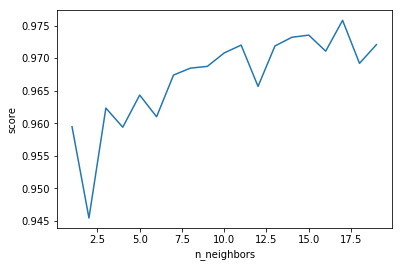

In [39]:
#%%pycodestyle
res = []
for i in range(1, 20):
    tmp = []
    for j in range(1000):
        X_train, X_test, y_train, y_test = \
            train_test_split(iris.data, iris.target,
                             test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        tmp.append(my_clf.score(X_test, y_test))
    res.append(np.mean(tmp))
print('best score: ', max(res))
print('best num of neighbors', np.argmax(res) + 1)
plt.plot(range(1, 20), res)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [15]:
#%%pycodestyle
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin,\
                                    SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mnist = fetch_mldata('MNIST original')

/Users/pavelermolaev/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/pavelermolaev/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 10.7 ms, sys: 2.62 ms, total: 13.3 ms
Wall time: 12.1 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 121 ms, sys: 130 ms, total: 251 ms
Wall time: 249 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 2.66 s, sys: 480 ms, total: 3.14 s
Wall time: 2.23 s


array([0., 0., 8., 3., 0., 0., 1., 2., 6., 3., 0., 3., 0., 2., 4., 4., 4.,
       4., 8., 9., 1., 9., 4., 0., 1., 8., 3., 2., 2., 1., 2., 1., 1., 9.,
       8., 0., 0., 2., 1., 8., 2., 5., 0., 7., 1., 1., 5., 6., 0., 3., 5.,
       7., 3., 2., 3., 2., 3., 4., 0., 8., 9., 1., 8., 7., 5., 0., 2., 9.,
       2., 2., 4., 7., 7., 2., 5., 6., 7., 1., 1., 0., 3., 9., 1., 5., 9.,
       2., 8., 1., 6., 7., 4., 5., 8., 5., 7., 7., 9., 3., 9., 9., 6., 5.,
       6., 1., 2., 2., 1., 7., 7., 3., 4., 2., 6., 7., 0., 2., 0., 0., 8.,
       8., 5., 1., 7., 3., 4., 7., 8., 1., 2., 0., 2., 7., 5., 6., 6., 5.,
       6., 8., 2., 5., 9., 6., 8., 0., 3., 3., 2., 8., 3., 5., 3., 0., 5.,
       6., 9., 7., 8., 7., 5., 3., 0., 1., 7., 4., 7., 4., 7., 7., 1., 7.,
       7., 3., 2., 2., 4., 4., 7., 4., 6., 2., 0., 5., 3., 0., 4., 9., 4.,
       2., 1., 7., 0., 5., 1., 8., 3., 9., 5., 9., 4., 9., 0., 4., 3., 0.,
       1., 3., 2., 3., 5., 2., 4., 8., 4., 8., 0., 8., 9., 1., 2., 4., 6.,
       5., 1., 6., 6., 0.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2.66 s, sys: 355 ms, total: 3.01 s
Wall time: 1.95 s


array([0., 0., 8., 3., 0., 0., 1., 2., 6., 3., 0., 3., 0., 2., 4., 4., 4.,
       4., 8., 9., 1., 9., 4., 0., 1., 8., 3., 2., 2., 1., 2., 1., 1., 9.,
       8., 0., 0., 2., 1., 8., 2., 5., 0., 7., 1., 1., 5., 6., 0., 3., 5.,
       7., 3., 2., 3., 2., 3., 4., 0., 8., 9., 1., 8., 7., 5., 0., 2., 9.,
       2., 2., 4., 7., 7., 2., 5., 6., 7., 1., 1., 0., 3., 9., 1., 5., 9.,
       2., 8., 1., 6., 7., 4., 5., 8., 5., 7., 7., 9., 3., 9., 9., 6., 5.,
       6., 1., 2., 2., 1., 7., 7., 3., 4., 2., 6., 7., 0., 2., 0., 0., 8.,
       8., 5., 1., 7., 3., 4., 7., 8., 1., 2., 0., 2., 7., 5., 6., 6., 5.,
       6., 8., 2., 5., 9., 6., 8., 0., 3., 3., 2., 8., 3., 5., 3., 0., 5.,
       6., 9., 7., 8., 7., 5., 3., 0., 1., 7., 4., 7., 4., 7., 7., 1., 7.,
       7., 3., 2., 2., 4., 4., 7., 4., 6., 2., 0., 5., 3., 0., 4., 9., 4.,
       2., 1., 7., 0., 5., 1., 8., 3., 9., 5., 9., 4., 9., 0., 4., 3., 0.,
       1., 3., 2., 3., 5., 2., 4., 8., 4., 8., 0., 8., 9., 1., 2., 4., 6.,
       5., 1., 6., 6., 0.

In [24]:
%time clf.predict_proba(X_test)

CPU times: user 2.6 s, sys: 397 ms, total: 2.99 s
Wall time: 1.95 s


array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ]])

In [25]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.51 s, sys: 256 ms, total: 2.76 s
Wall time: 1.74 s


array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ]])

In [26]:
clf.score(X_test, y_test)

0.9685714285714285

In [27]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 4

In [40]:
clf = KNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=17, algorithm='kd_tree')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [42]:
%time clf.fit(X_train, y_train)

CPU times: user 26.3 s, sys: 310 ms, total: 26.6 s
Wall time: 26.7 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [43]:
%time my_clf.fit(X_train, y_train)

CPU times: user 24.1 s, sys: 231 ms, total: 24.3 s
Wall time: 24.5 s


In [44]:
%time clf.predict(X_test)

CPU times: user 57 s, sys: 179 ms, total: 57.2 s
Wall time: 57.4 s


array([2., 7., 5., 8., 2., 2., 1., 0., 3., 2., 2., 5., 1., 5., 5., 4., 0.,
       2., 6., 5., 3., 5., 2., 5., 1., 7., 6., 4., 1., 4., 4., 3., 6., 0.,
       8., 1., 3., 8., 7., 3., 1., 5., 9., 8., 9., 9., 7., 7., 7., 0., 0.,
       4., 6., 8., 2., 5., 7., 3., 7., 4., 0., 1., 6., 7., 6., 5., 7., 8.,
       2., 4., 5., 5., 3., 3., 9., 5., 5., 8., 9., 2., 7., 8., 1., 9., 8.,
       9., 0., 3., 7., 4., 3., 2., 8., 2., 5., 0., 8., 7., 7., 3., 9., 7.,
       1., 8., 3., 7., 2., 7., 0., 9., 5., 7., 7., 5., 7., 7., 3., 4., 9.,
       7., 3., 9., 4., 6., 9., 3., 0., 8., 1., 2., 9., 9., 7., 2., 5., 2.,
       9., 9., 5., 2., 1., 1., 0., 0., 3., 1., 4., 9., 1., 7., 8., 0., 1.,
       5., 6., 6., 1., 1., 2., 7., 3., 8., 6., 0., 4., 9., 2., 4., 1., 3.,
       7., 3., 4., 7., 2., 4., 7., 8., 1., 1., 9., 0., 3., 1., 1., 3., 4.,
       0., 7., 0., 8., 8., 8., 8., 3., 0., 5., 2., 2., 6., 8., 3., 8., 0.,
       6., 2., 1., 6., 7., 0., 1., 5., 9., 6., 2., 1., 3., 1., 9., 1., 4.,
       6., 0., 9., 3., 0.

In [45]:
%time my_clf.predict(X_test)

CPU times: user 49.8 s, sys: 122 ms, total: 49.9 s
Wall time: 50.1 s


array([2., 7., 5., 8., 2., 2., 1., 0., 3., 2., 2., 5., 1., 5., 5., 4., 0.,
       2., 6., 5., 3., 5., 2., 5., 1., 7., 6., 4., 1., 4., 4., 3., 6., 0.,
       8., 1., 3., 8., 7., 3., 1., 5., 9., 8., 9., 9., 7., 7., 7., 0., 0.,
       4., 6., 8., 2., 5., 7., 3., 7., 4., 0., 1., 6., 7., 6., 5., 7., 8.,
       2., 4., 5., 5., 3., 3., 9., 5., 5., 8., 9., 2., 7., 8., 1., 9., 8.,
       9., 0., 3., 7., 4., 3., 2., 8., 2., 5., 0., 8., 7., 7., 3., 9., 7.,
       1., 8., 3., 7., 2., 7., 0., 9., 5., 7., 7., 5., 7., 7., 3., 4., 9.,
       7., 3., 9., 4., 6., 9., 3., 0., 8., 1., 2., 9., 9., 7., 2., 5., 2.,
       9., 9., 5., 2., 1., 1., 0., 0., 3., 1., 4., 9., 1., 7., 8., 0., 1.,
       5., 6., 6., 1., 1., 2., 7., 3., 8., 6., 0., 4., 9., 2., 4., 1., 3.,
       7., 3., 4., 7., 2., 4., 7., 8., 1., 1., 9., 0., 3., 1., 1., 3., 4.,
       0., 7., 0., 8., 8., 8., 8., 3., 0., 5., 2., 2., 6., 8., 3., 8., 0.,
       6., 2., 1., 6., 7., 0., 1., 5., 9., 6., 2., 1., 3., 1., 9., 1., 4.,
       6., 0., 9., 3., 0.

In [46]:
%time clf.predict_proba(X_test)

CPU times: user 57.8 s, sys: 181 ms, total: 58 s
Wall time: 58.2 s


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.82352941, 0.        ,
        0.17647059],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.11764706,
        0.23529412]])

In [47]:
%time my_clf.predict_proba(X_test)

CPU times: user 49.7 s, sys: 79.9 ms, total: 49.8 s
Wall time: 49.9 s


array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.82352941, 0.        ,
        0.17647059],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.11764706,
        0.23529412]])

In [48]:
clf.score(X_test, y_test)

0.9585714285714285

In [49]:
my_clf.score(X_test, y_test)

0.9585714285714286

Задание 5

In [50]:
# seaborn - надстройка над matplotlib для более красивой отрисовки + некоторые новые возможности отрисовки
# matplotlib - бибилотека для рисованияб визуализации данных
# train_test_split - разделение датасета на обучающуб и тестовую выборки по некоторым притериям (размер и алгоритм выбора примеров)
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) конструкция для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - приводит распределение к нормальному виду (в параметрах - среднее значение, стандартное отклонение)
# ClassifierMixin - стандартный класс  в sklearn для классификатора
# NeighborsBase - базовый класс для KNN в sklearn
# KNeighborsMixin - базовый класс для поиска ближайших соседей
# SupervisedIntegerMixin - базовый класс, содержащий метод fit